<a href="https://colab.research.google.com/github/ChetanCRS/ChetanCRS.github.io/blob/main/ParticleClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
cols=["fLength", "fWidth", "fSize", "fCone", "fCone1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df=pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fCone,fCone1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
df['class'] = (df["class"] == "g").astype(int)

In [7]:
df.head()

,fLength,fWidth,fSize,fCone,fCone1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


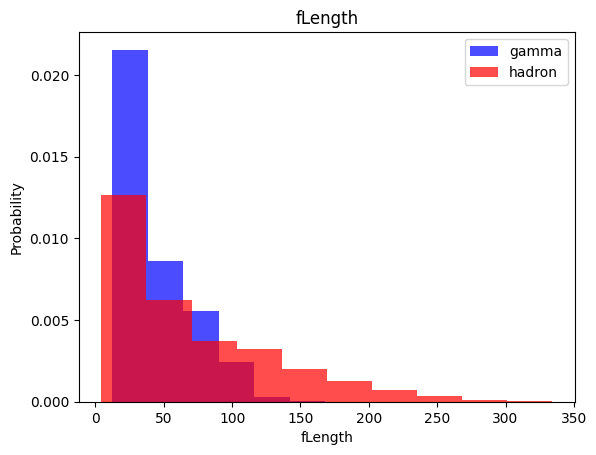

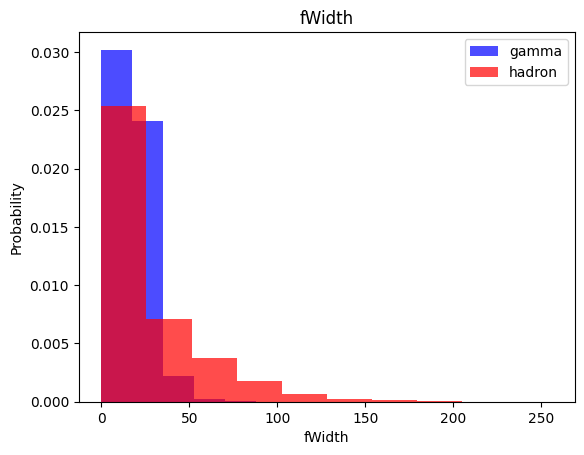

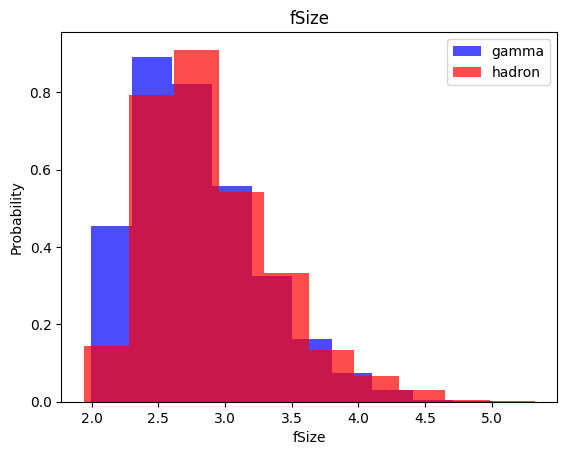

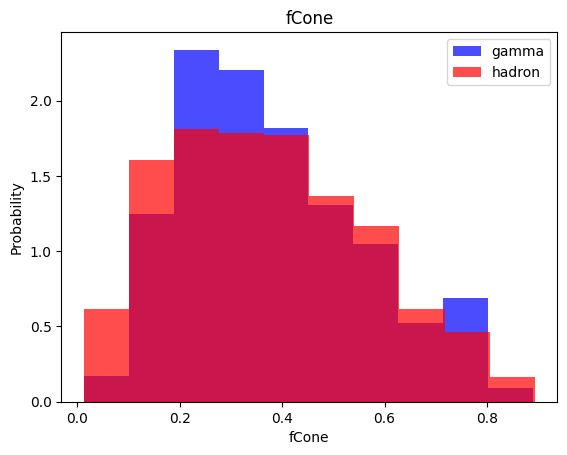

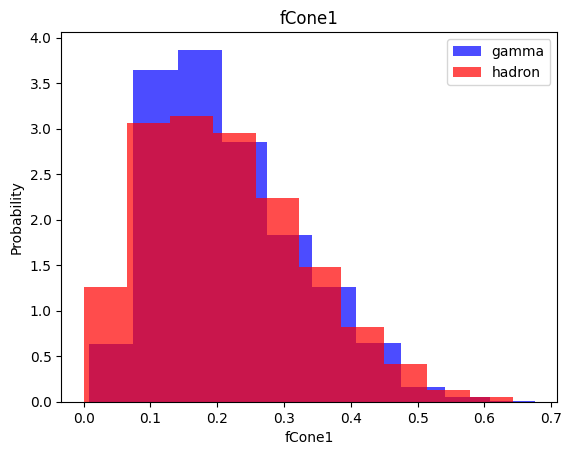

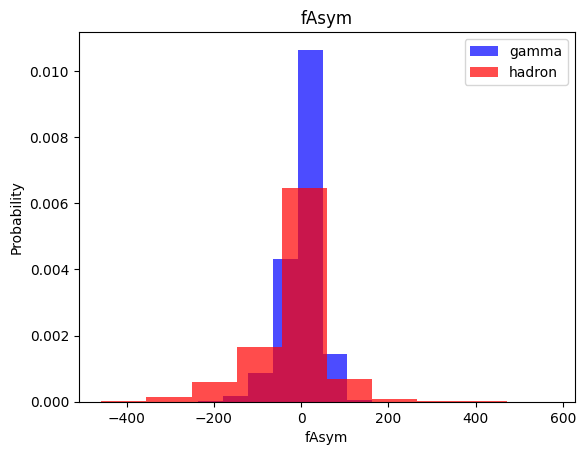

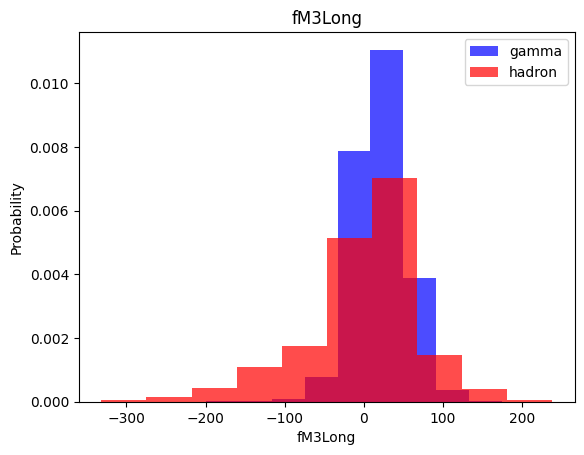

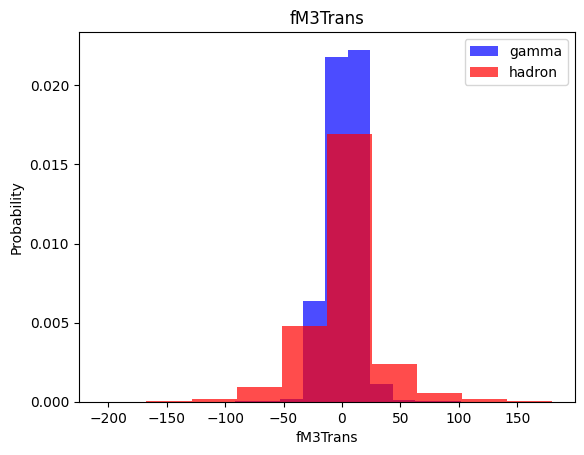

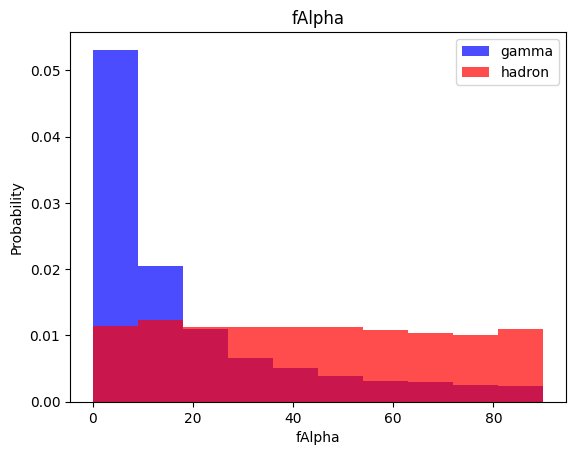

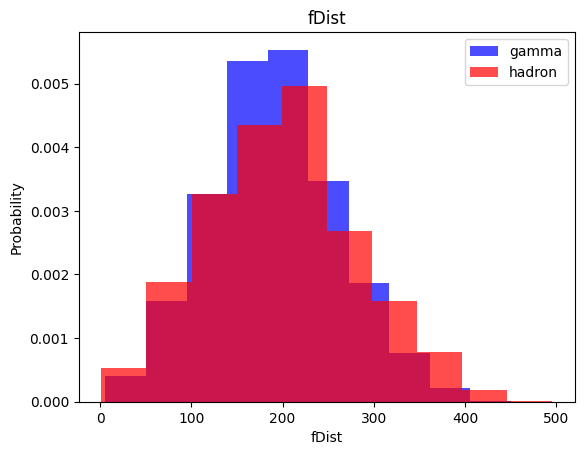

In [8]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Validation, Test datasets.

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  # Check if the input is a pandas DataFrame or a NumPy array
  if isinstance(dataframe, pd.DataFrame):
    X = dataframe[dataframe.columns[:-1]].values
    Y = dataframe[dataframe.columns[-1]].values
  else: # Assume it's a NumPy array
    X = dataframe[:, :-1]
    Y = dataframe[:, -1]

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y)

  data = np.hstack((X, np.reshape(Y, (-1, 1))))

  return data, X, Y, scaler

In [ ]:
print(len(train[train['class']==1]))  #gamma
print(len(train[train['class']==0]))  #hadron

7452
3960


In [ ]:
train, X_train, Y_train = scale_dataset(train,oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid,oversample=False)
test, X_test, Y_test = scale_dataset(test,oversample=False)

#K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
Y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.73      0.73      1322
         1.0       0.86      0.85      0.86      2482

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.47      0.52      1322
         1.0       0.75      0.83      0.79      2482

    accuracy                           0.70      3804
   macro avg       0.67      0.65      0.65      3804
weighted avg       0.69      0.70      0.69      3804



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [ ]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.63      0.78      0.70      1322
         1.0       0.86      0.76      0.81      2482

    accuracy                           0.76      3804
   macro avg       0.75      0.77      0.75      3804
weighted avg       0.78      0.76      0.77      3804



#Support Vector Machines(SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [ ]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.85      0.80      1322
         1.0       0.91      0.85      0.88      2482

    accuracy                           0.85      3804
   macro avg       0.83      0.85      0.84      3804
weighted avg       0.86      0.85      0.85      3804



#Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0.5, 1])
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

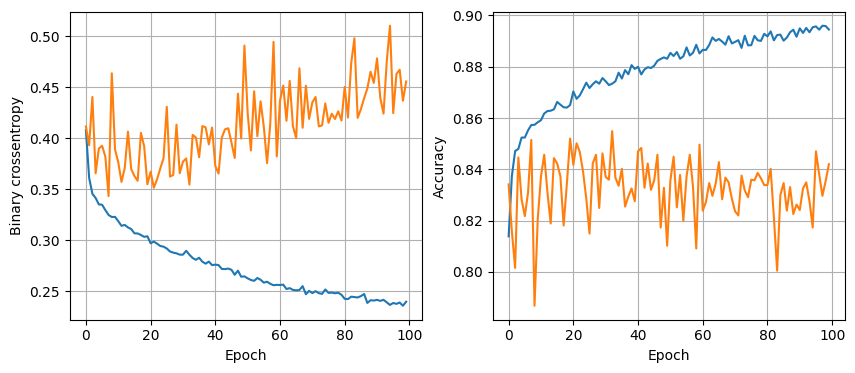

In [ ]:
plot_history(history)

In [ ]:
def train_model(X_train, Y_train, num_modes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation ='relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(32, activation ='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation ='sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy', metrics = ['accuracy'])
  history = nn_model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, validation_data = (X_valid, Y_valid), verbose=0)

  return nn_model, history

32 nodes, dropout 0, lr 0.001, batch size 64


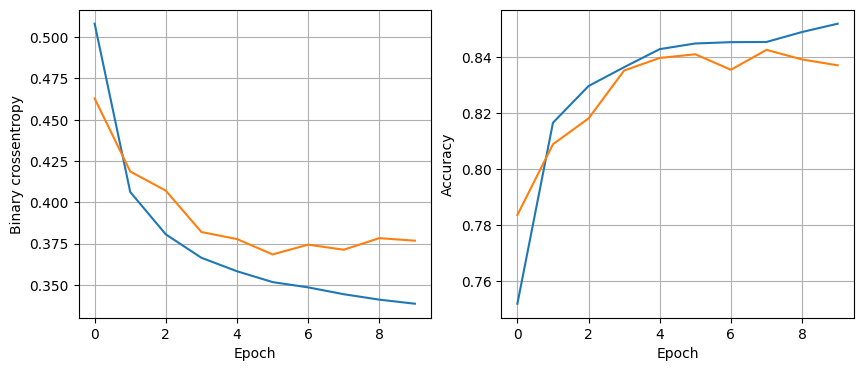

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.3854
32 nodes, dropout 0, lr 0.005, batch size 64


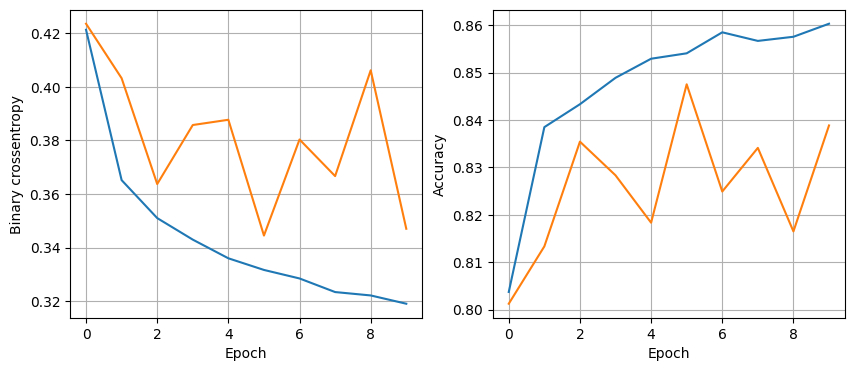

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8312 - loss: 0.3531
32 nodes, dropout 0.2, lr 0.001, batch size 64


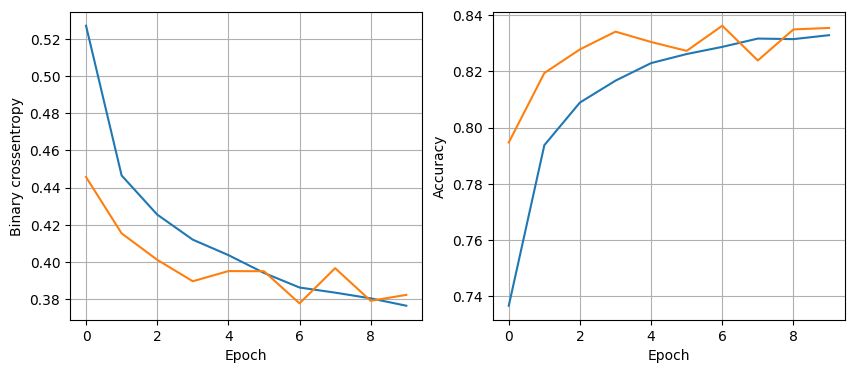

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8281 - loss: 0.3930
32 nodes, dropout 0.2, lr 0.005, batch size 64


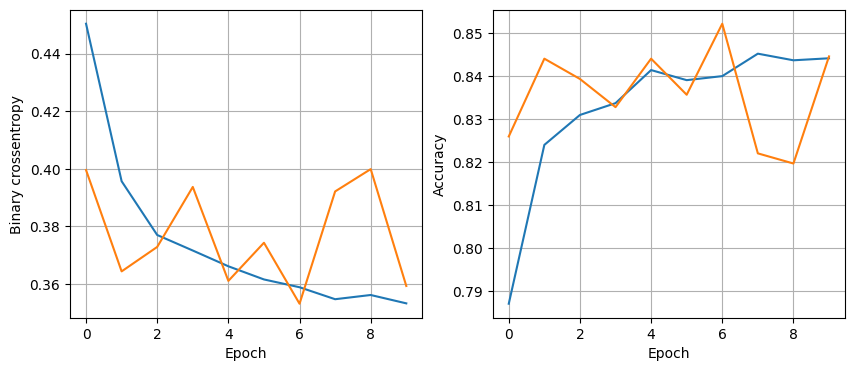

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8376 - loss: 0.3673
64 nodes, dropout 0, lr 0.001, batch size 64


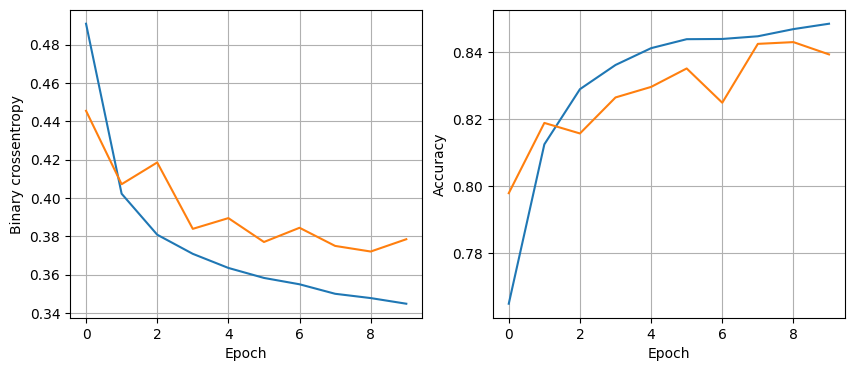

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8255 - loss: 0.3923
64 nodes, dropout 0, lr 0.005, batch size 64


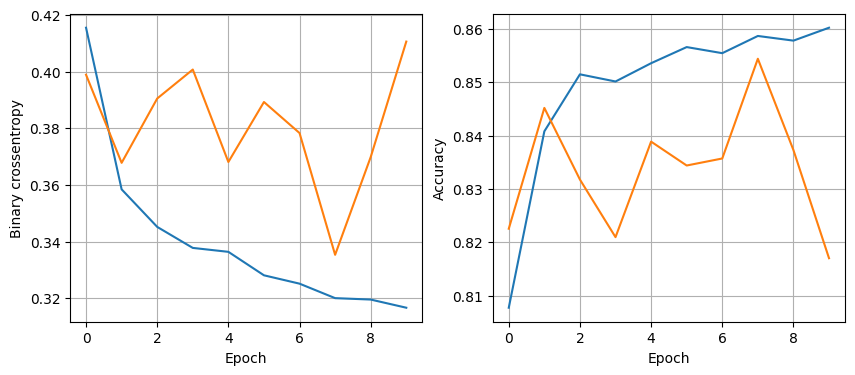

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8124 - loss: 0.4210
64 nodes, dropout 0.2, lr 0.001, batch size 64


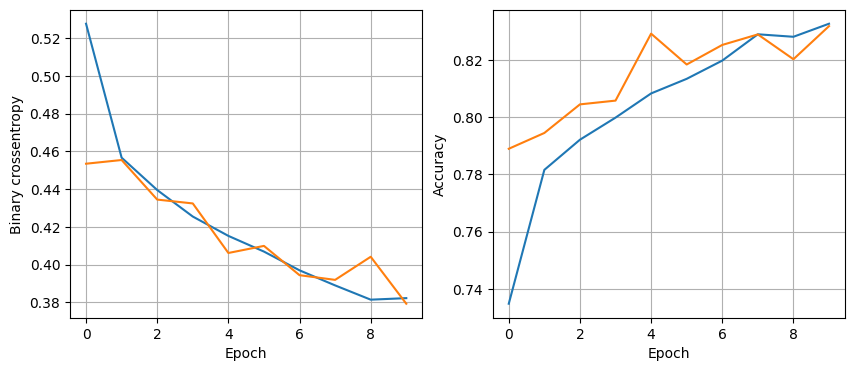

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8258 - loss: 0.3880
64 nodes, dropout 0.2, lr 0.005, batch size 64


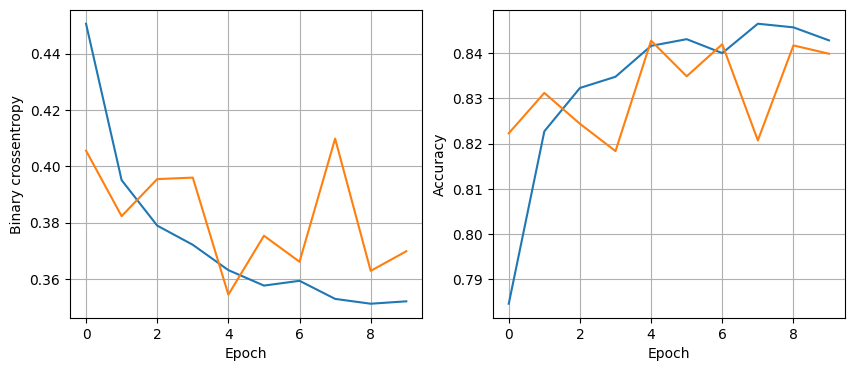

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.3782


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 10

# Reduced combinations while keeping diversity
for num_nodes in [32, 64]:                  # Mid and larger network
    for dropout_prob in [0, 0.2]:            # With/without dropout
        for lr in [0.001, 0.005]:            # Safe learning rates
            batch_size = 64                  # Middle ground batch size
            print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
            model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
            plot_history(history)
            val_loss = model.evaluate(X_valid, Y_valid)
            if val_loss[0] < least_val_loss:
                least_val_loss = val_loss[0]
                least_loss_model = model


In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(Y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.72      0.87      0.79      1322
         1.0       0.92      0.82      0.87      2482

    accuracy                           0.84      3804
   macro avg       0.82      0.84      0.83      3804
weighted avg       0.85      0.84      0.84      3804



In [ ]:
from google.colab import files
import os, json, joblib

# Create a temporary local save directory in Colab's /content folder
SAVE_DIR = '/content/particle_classification'
os.makedirs(SAVE_DIR, exist_ok=True)

# 1) Save the current best model
if least_loss_model is not None:
    model_path = os.path.join(SAVE_DIR, 'best_model.keras')
    least_loss_model.save(model_path)
    files.download(model_path)  # prompts download to your local machine

# 2) Save the best val loss and any other state
state = {'least_val_loss': float(least_val_loss)}
state_path = os.path.join(SAVE_DIR, 'state.json')
with open(state_path, 'w') as f:
    json.dump(state, f)
files.download(state_path)
